In [1]:
import cv2
import numpy as np
from numpy import asarray
import imageio
import matplotlib.pyplot as plt

In [2]:
from tensorflow.keras.models import load_model

In [3]:
model = load_model("model_np5")

In [4]:
labels = ['shashank','vishvesh','vasudev']

In [109]:
image = imageio.imread("training/shashank/shashank/shashank-21.png")
image = imageio.imread("training/vishvesh/vishvesh/vishvesh-124.png")
#image = imageio.imread("training/vasudev/vasudev-198.png")

In [110]:
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
resized_img = cv2.resize(gray,(128,128))
img = asarray(gray)/255
img = np.resize(img,(128,128,1))
img = img.reshape(-1,128,128,1)
pred = model.predict_classes(img)
print(pred)

[1]


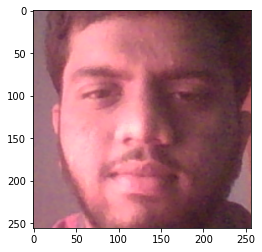

In [22]:
plt.imshow(image)

In [5]:
vid = cv2.VideoCapture(0)
face_cascade = cv2.CascadeClassifier('haarcascade_frontalface_alt.xml')

In [6]:
while True:
    ret,frame = vid.read()
    faces = face_cascade.detectMultiScale(frame,1.1,4)

   
    if faces is None:
        continue
    else:
        for (x, y, w, h) in faces:
            #center = (x + w//2, y + h//2)
            crop = frame[y:y+h,x:x+w]
            gray = cv2.cvtColor(crop, cv2.COLOR_BGR2GRAY)
            resized_img = cv2.resize(gray,(128,128))
            img = asarray(gray)/255
            img = np.resize(img,(128,128,1))
            img = img.reshape(-1,128,128,1)
            acc = np.max(model.predict(img))
            pred = int(model.predict_classes(img))
            if acc<=0.95:
                txt = "U"  #+  str(acc)
            else:
                txt = labels[pred]        #str(pred) +  str(acc)
        cv2.rectangle(frame,(x,y),(x+w,y+h),(0,255,0),4)
        cv2.putText(frame,txt,(x,y),cv2.FONT_HERSHEY_COMPLEX,2,(0,0,255))
            
    cv2.imshow('video',frame)
    
    if cv2.waitKey(10)==27:
        break
        
    
vid.release()
cv2.destroyAllWindows()

NameError: name 'x' is not defined

In [19]:
vid.release()
cv2.destroyAllWindows()

In [108]:
model.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_10 (Conv2D)           (None, 126, 126, 36)      360       
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 63, 63, 36)        0         
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 62, 62, 54)        7830      
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 31, 31, 54)        0         
_________________________________________________________________
flatten_5 (Flatten)          (None, 51894)             0         
_________________________________________________________________
dense_20 (Dense)             (None, 1024)              53140480  
_________________________________________________________________
dropout_10 (Dropout)         (None, 1024)             